# Introduction

- Chicago Beach Water Quality
- Chicago Park District Sensor Data
- Beach Water Quality - Automated Sensors

The Chicago Park District maintains sensors in the water at beaches along Chicago's Lake Michigan lakefront. These sensors generally capture the indicated measurements hourly while the sensors are in operation during the summer. During other seasons and at some other times, information from the sensors may not be available. 

### Content and Meaning of the data

Beach Name
Measurement Timestamp
Water Temperature
Turbidity
Transducer Depth
Wave Height
Wave Period
Battery Life
Measurement Timestamp Label
Measurement ID



# Data Exploration & processing

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import os
import plotly.graph_objects as go
import plotly.express as px

plt.style.use("ggplot") # for using style graph ggplot

In [2]:
#Importing the dataset

df=pd.read_csv("../input/chicago-beach-water-quality/bwq.csv")

In [3]:
# looking the data set
df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Montrose Beach,08/30/2013 08:00:00 AM,20.3,1.18,0.891,0.080,3.0,9.4,8/30/2013 8:00 AM,MontroseBeach201308300800
1,Ohio Street Beach,05/26/2016 01:00:00 PM,14.4,1.23,NaN,0.111,4.0,12.4,05/26/2016 1:00 PM,OhioStreetBeach201605261300
2,Calumet Beach,09/03/2013 04:00:00 PM,23.2,3.63,1.201,0.174,6.0,9.4,9/3/2013 4:00 PM,CalumetBeach201309031600
3,Calumet Beach,05/28/2014 12:00:00 PM,16.2,1.26,1.514,0.147,4.0,11.7,5/28/2014 12:00 PM,CalumetBeach201405281200
4,Montrose Beach,05/28/2014 12:00:00 PM,14.4,3.36,1.388,0.298,4.0,11.9,5/28/2014 12:00 PM,MontroseBeach201405281200


In [4]:
# print the shape dataset
print("Shape The DataSet ", df.shape )

Shape The DataSet  (34923, 10)


In [5]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34923 entries, 0 to 34922
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Beach Name                   34923 non-null  object 
 1   Measurement Timestamp        34917 non-null  object 
 2   Water Temperature            34917 non-null  float64
 3   Turbidity                    34917 non-null  float64
 4   Transducer Depth             10034 non-null  float64
 5   Wave Height                  34690 non-null  float64
 6   Wave Period                  34690 non-null  float64
 7   Battery Life                 34917 non-null  float64
 8   Measurement Timestamp Label  34917 non-null  object 
 9   Measurement ID               34923 non-null  object 
dtypes: float64(6), object(4)
memory usage: 2.7+ MB


- Inference : We need convert the type Date from object to datetime.

In [6]:
 # convert data type
df['Measurement Timestamp']=pd.to_datetime(df['Measurement Timestamp'])
df['Measurement Timestamp Label']=pd.to_datetime(df['Measurement Timestamp Label'])

In [7]:
#checking null value 
df.isna().sum()

Beach Name                         0
Measurement Timestamp              6
Water Temperature                  6
Turbidity                          6
Transducer Depth               24889
Wave Height                      233
Wave Period                      233
Battery Life                       6
Measurement Timestamp Label        6
Measurement ID                     0
dtype: int64

- Inference : We have a lot of missing value at the column [ Transducer Depth ] , I will drop this column and fill missing data at  the Wave Height & Preiod column = mean

In [8]:
# drop
df.drop('Transducer Depth',axis=1,inplace=True)


In [9]:
# fill missing data = mean 

df['Wave Height'].fillna(value=df['Wave Height'].mean(), inplace=True)

df['Wave Period'].fillna(value=df['Wave Period'].mean(), inplace=True)

In [10]:
# now we still 6 non value I will drop this value , It has no effect on the data

df.dropna(inplace=True)

#checking null value 
df.isna().sum()

Beach Name                     0
Measurement Timestamp          0
Water Temperature              0
Turbidity                      0
Wave Height                    0
Wave Period                    0
Battery Life                   0
Measurement Timestamp Label    0
Measurement ID                 0
dtype: int64

- Now , done cleaning data and change the data type

In [11]:
# data set describe
df.describe().round(2)

,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
count,34917.00,34917.00,34917.00,34917.00,34917.00
mean,19.36,4.82,-1516.12,-1512.48,11.04
std,3.36,33.51,12180.46,12180.91,0.77
min,0.00,0.00,-99999.99,-100000.00,4.80
25%,17.10,0.66,0.11,3.00,10.60
50%,19.60,1.26,0.15,3.00,11.00
75%,22.00,2.54,0.20,4.00,11.50
max,31.50,1683.48,1.47,10.00,13.30


- Inference : We have a lot of outlier value

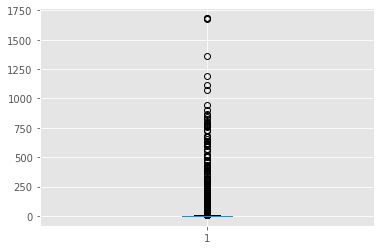

In [12]:
plt.boxplot(x=df["Turbidity"])
plt.show()

In [13]:
df[df["Wave Height"]==-99999.992]

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
16945,Ohio Street Beach,2016-07-24 15:00:00,31.5,14.73,-99999.992,-100000.0,9.8,2016-07-24 15:00:00,OhioStreetBeach201607241500
18038,Rainbow Beach,2015-07-15 00:00:00,18.8,28.09,-99999.992,-100000.0,10.3,2015-07-15 00:00:00,RainbowBeach201507152400
18048,Rainbow Beach,2015-07-15 01:00:00,18.7,70.63,-99999.992,-100000.0,9.8,2015-07-15 01:00:00,RainbowBeach201507150100
18050,Rainbow Beach,2015-07-15 05:00:00,18.3,25.92,-99999.992,-100000.0,10.2,2015-07-15 05:00:00,RainbowBeach201507150500
18057,Rainbow Beach,2015-07-15 06:00:00,18.3,23.87,-99999.992,-100000.0,10.2,2015-07-15 06:00:00,RainbowBeach201507150600
...,...,...,...,...,...,...,...,...,...
30196,Rainbow Beach,2015-10-01 04:00:00,15.8,0.15,-99999.992,-100000.0,10.4,2015-10-01 04:00:00,RainbowBeach201510010400
30197,Rainbow Beach,2015-10-01 05:00:00,15.9,8.59,-99999.992,-100000.0,5.7,2015-10-01 05:00:00,RainbowBeach201510010500
30198,Rainbow Beach,2015-10-01 06:00:00,15.8,357.35,-99999.992,-100000.0,10.4,2015-10-01 06:00:00,RainbowBeach201510010600
33967,Rainbow Beach,2015-10-01 07:00:00,14.1,0.00,-99999.992,-100000.0,10.4,2015-10-01 07:00:00,RainbowBeach201510010700


- Inference : We have a 526 rows have value Wave Height= -99999.92 and value Wave Period =-10000000 , 526 row to 35000 rows all the data , it`s the better drop this value

In [14]:
# make now dataframe without negative value Wave Height and Wave Period

data=df[df["Wave Height"]>0]

In [15]:
data.describe()

,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
count,34164.000000,34164.000000,34164.000000,34164.000000,34164.000000
mean,19.326985,4.516535,0.173457,3.863658,11.070437
std,3.362642,27.868854,0.086944,1.584148,0.656459
min,0.000000,0.000000,0.013000,1.000000,5.900000
25%,17.100000,0.660000,0.112000,3.000000,10.600000
50%,19.500000,1.240000,0.156000,3.000000,11.000000
75%,22.000000,2.490000,0.202000,4.000000,11.500000
max,29.200000,1190.020000,1.467000,10.000000,13.300000


- Inference : this data now , at least without outlier 

# Visualizations and Analysis

In [16]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Montrose Beach,2013-08-30 08:00:00,20.3,1.18,0.080,3.0,9.4,2013-08-30 08:00:00,MontroseBeach201308300800
1,Ohio Street Beach,2016-05-26 13:00:00,14.4,1.23,0.111,4.0,12.4,2016-05-26 13:00:00,OhioStreetBeach201605261300
2,Calumet Beach,2013-09-03 16:00:00,23.2,3.63,0.174,6.0,9.4,2013-09-03 16:00:00,CalumetBeach201309031600
3,Calumet Beach,2014-05-28 12:00:00,16.2,1.26,0.147,4.0,11.7,2014-05-28 12:00:00,CalumetBeach201405281200
4,Montrose Beach,2014-05-28 12:00:00,14.4,3.36,0.298,4.0,11.9,2014-05-28 12:00:00,MontroseBeach201405281200


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Beach Name', ylabel='count'>

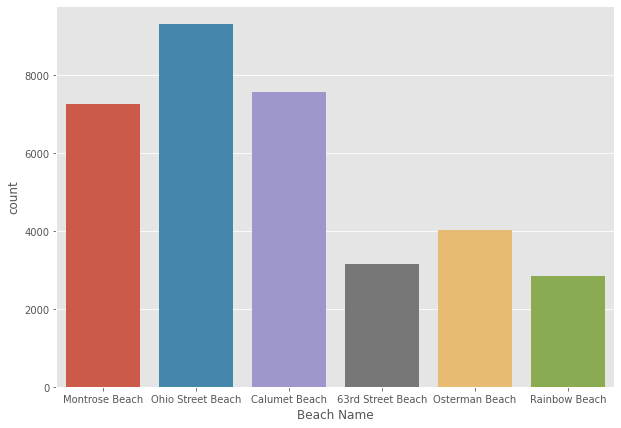

In [17]:
# how much repeat the Beach Name ?
plt.figure(figsize=(10,7))
sns.countplot(data["Beach Name"])

In [18]:
# interactive graph
px.scatter(data,x="Measurement Timestamp",y="Water Temperature",animation_frame="Beach Name")

<AxesSubplot:xlabel='Measurement Timestamp', ylabel='Water Temperature'>

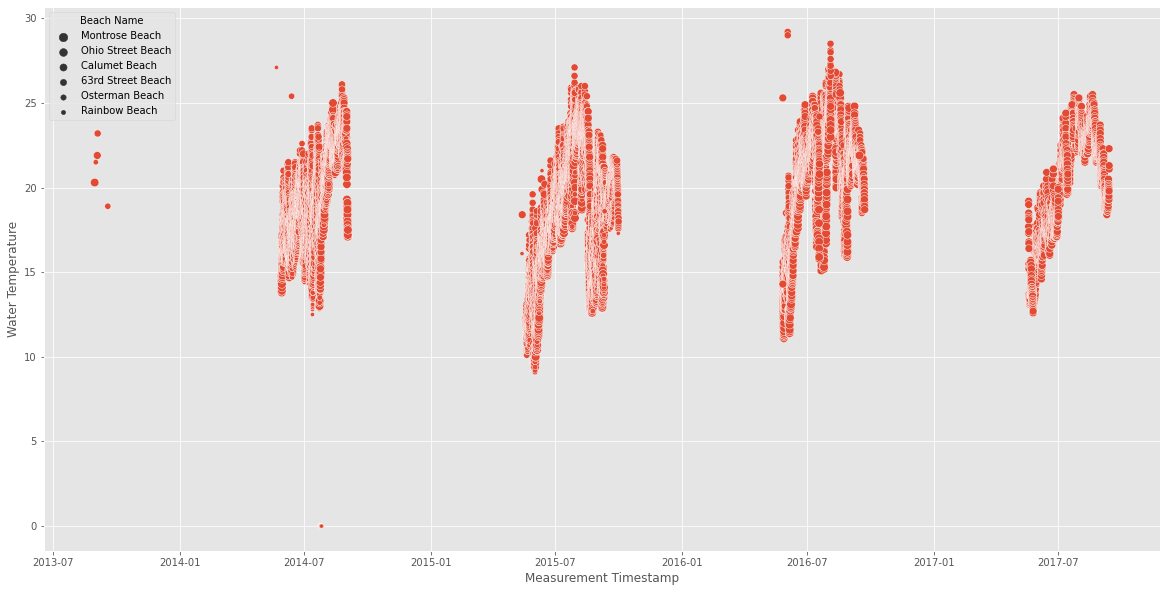

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data,x="Measurement Timestamp",y="Water Temperature", size="Beach Name")

<AxesSubplot:xlabel='Measurement Timestamp', ylabel='Turbidity'>

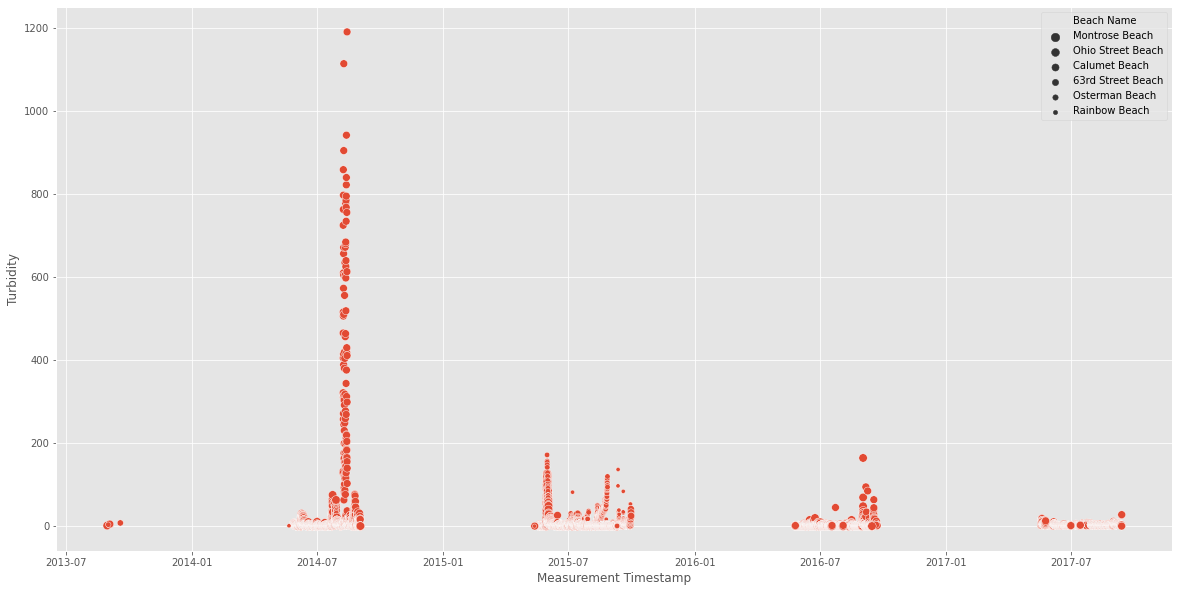

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data,x="Measurement Timestamp",y="Turbidity", size="Beach Name")

<AxesSubplot:xlabel='Measurement Timestamp', ylabel='Wave Height'>

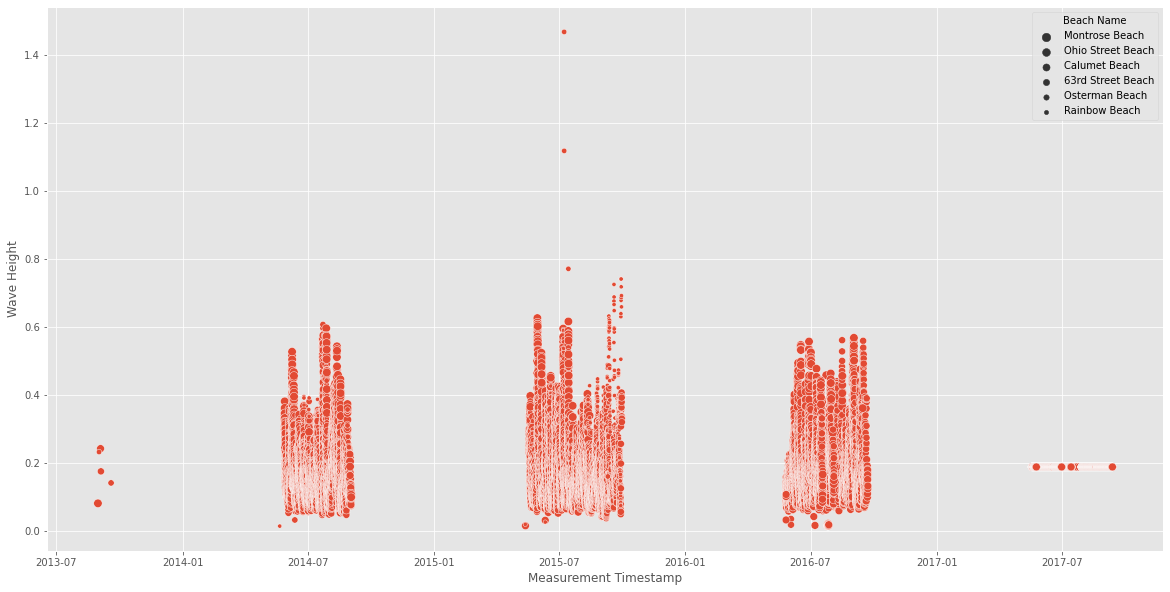

In [21]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data,x="Measurement Timestamp",y="Wave Height", size="Beach Name")

In [22]:
# group by
data_gr=data.groupby("Beach Name").mean()
data_gr

,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
Beach Name,,,,,
63rd Street Beach,18.396728,1.907948,0.155694,4.205527,11.114676
Calumet Beach,20.372929,1.886428,0.152553,3.532435,10.973841
Montrose Beach,18.640534,2.898791,0.202249,4.330627,11.078729
Ohio Street Beach,20.255074,7.642905,0.159788,3.464954,11.058353
Osterman Beach,17.933615,8.707598,0.184694,4.003232,11.138339
Rainbow Beach,18.266340,2.393569,0.203868,4.278459,11.200350


<AxesSubplot:xlabel='Beach Name'>

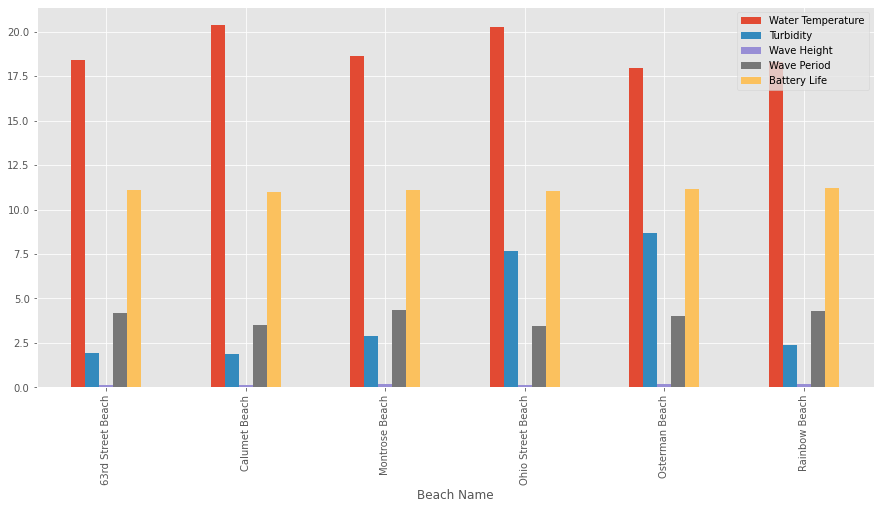

In [23]:
data_gr.plot(kind="bar", figsize=(15,7))

- The values are similar in all beaches, but the difference is in Turbidity

# The End 

- Thank for reading my analysis , 
- If you any questions or advice me please write in the comment ,

# Vote
- If you liked my analysis vote me ,